In [1]:
import random
import numpy as np
import pandas as pd
import json
import math

from deap import base, creator, tools, algorithms
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [3]:
data  = pd.read_csv('data.csv')
coordinates = data.loc[:, 'COORD':'SECTION'].values.tolist()
num_of_cities = len(data)
cities = range(len(data.loc[:, 'NODE'].values))
cityDict = list(zip(cities, coordinates))

In [4]:
toolbox = base.Toolbox()
# permutation for individuals to be generated population
toolbox.register("indices", random.sample, range(num_of_cities), num_of_cities)
toolbox.register("individual", tools.initIterate, creator.Individual,toolbox.indices)
# population
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [5]:
def evaluation(iterations, cityDict, sample):
    eucl_distance = []
    temp = 0
    for i in range(iterations-1):
        currentCityCoord = np.asarray(cityDict[sample[i]][1])
        nextCityCoord = np.asarray(cityDict[sample[i+1]][1])
        temp = np.linalg.norm(currentCityCoord - nextCityCoord)   
        eucl_distance.append(temp)
    return [sum(eucl_distance)]


In [6]:
toolbox.register("evaluate", evaluation,num_of_cities,coordinates)
toolbox.register("mate", tools.cxOrdered) #crossover
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05) #mutation
toolbox.register("select", tools.selTournament, tournsize=4) #selection

In [7]:
def implement():
    random.seed(39)
    POP_SIZE = 200
    N_ITERATIONS = 1000
    
    pops = toolbox.population(POP_SIZE)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    algorithms.eaSimple(pops, toolbox,cxpb=0.7,mutpb=0.05, ngen=N_ITERATIONS, stats=stats, halloffame=hof)
    
    best_ind = tools.selBest(pops, 1)[0]
    
    return best_ind

In [8]:
individual = implement()

gen	nevals	avg    	std    	min 	max 
0  	200   	4678.19	182.211	4211	5241
1  	139   	4512.48	156.276	4116	4962
2  	128   	4363.57	153.368	3982	4748
3  	138   	4266.27	140.618	3947	4694
4  	144   	4173.3 	138.078	3656	4654
5  	147   	4090.87	157.044	3548	4668
6  	136   	4009.98	158.766	3677	4507
7  	132   	3915.36	131.585	3642	4319
8  	139   	3847.68	134.212	3531	4445
9  	147   	3768.44	120.454	3531	4150
10 	141   	3717.73	119.83 	3432	4140
11 	151   	3688.23	127.229	3389	4107
12 	145   	3621.95	111.66 	3379	3968
13 	149   	3563.18	115.575	3297	4091
14 	139   	3509.9 	118.956	3283	4018
15 	146   	3481.59	116.591	3282	3862
16 	153   	3430.24	108.229	3165	3865
17 	147   	3382.37	109.199	3165	3885
18 	142   	3355.03	118.65 	3158	3954
19 	139   	3323.48	130.928	3069	4012
20 	152   	3269.59	96.7112	3069	3604
21 	114   	3235.39	111.348	3030	3834
22 	133   	3206.82	104.643	3021	3591
23 	130   	3162.85	104.141	2957	3742
24 	117   	3116.32	99.4373	2902	3654
25 	145   	3080.12	110.572	2902	3648
2

221	143   	1054.87	122.887	1029	1779
222	149   	1082.14	189.785	1029	2307
223	136   	1067.86	170.695	1029	2360
224	141   	1060.34	151.855	1029	2052
225	139   	1048.19	108.863	1029	2037
226	142   	1060.39	152.049	1029	2187
227	139   	1046.77	107.041	1029	1921
228	134   	1077.53	187.19 	1029	2083
229	161   	1058.3 	143.394	1029	2257
230	145   	1057.96	146.184	1029	2027
231	145   	1046.1 	114.845	1029	1973
232	148   	1057.68	133.27 	1029	1899
233	126   	1074.71	182.109	1029	2147
234	146   	1079.93	199.768	1029	2241
235	151   	1064.85	171.96 	1029	2279
236	138   	1051.77	126.966	1029	2109
237	142   	1050.88	120.548	1029	2063
238	131   	1067.9 	166.979	1029	2129
239	159   	1059.64	150.161	1029	2221
240	141   	1068.99	172.913	1029	2145
241	140   	1078.2 	197.768	1029	2128
242	135   	1089.02	217.844	1029	2571
243	158   	1051.16	130.341	1029	2119
244	132   	1074.43	164.555	1029	1877
245	135   	1066.43	161.146	1029	1997
246	149   	1063.95	167.827	1029	2015
247	147   	1043.57	90.2958	1029	1851
2

443	143   	1055.23	125.702	1029	1975
444	146   	1057.54	144.595	1029	2221
445	131   	1065.34	167.627	1029	2241
446	131   	1055.67	131.441	1029	1993
447	151   	1057.46	146.595	1029	2023
448	142   	1094.79	228.643	1029	2237
449	146   	1092.76	229.663	1029	2355
450	140   	1061.73	143.372	1029	1949
451	141   	1047.34	106.723	1029	1889
452	141   	1064.2 	176.447	1029	2257
453	152   	1068.47	172.689	1029	2133
454	135   	1048.2 	108.445	1029	1941
455	137   	1054.38	134.605	1029	1910
456	159   	1064.26	154.419	1029	1991
457	150   	1073.22	178.463	1029	2179
458	141   	1064.04	169.934	1029	2209
459	152   	1063.55	158.846	1029	2106
460	154   	1070.8 	191.542	1029	2427
461	160   	1048.56	109.159	1029	2003
462	141   	1056.84	124.92 	1029	1783
463	143   	1054.97	137.068	1029	2203
464	151   	1079.61	190.396	1029	2037
465	148   	1049.65	115.307	1029	1875
466	142   	1074.34	179.918	1029	2219
467	152   	1057.71	126.995	1029	1863
468	150   	1072.75	187.927	1029	2361
469	144   	1063.88	164.747	1029	2243
4

665	154   	1052.41	124.225	1029	2011
666	145   	1073.63	169.188	1029	2019
667	117   	1070.59	186.477	1029	2309
668	155   	1053.15	132.61 	1029	2097
669	140   	1091.51	211.586	1029	2265
670	158   	1084.2 	203.617	1029	2417
671	143   	1049.33	119.836	1029	1936
672	152   	1050.82	132.654	1029	2283
673	140   	1050.47	129.101	1029	2221
674	148   	1064.93	150.592	1029	2113
675	166   	1071.74	195.39 	1029	2305
676	138   	1068.46	169.173	1029	2001
677	147   	1060.65	151.587	1029	2119
678	137   	1059.21	151.857	1029	2117
679	158   	1072.85	176.185	1029	2208
680	153   	1083.04	202.072	1029	2237
681	136   	1070.8 	181.687	1029	2258
682	160   	1062.98	150.303	1029	2161
683	130   	1073.28	179.783	1029	2120
684	149   	1064.45	154.381	1029	1991
685	154   	1052.53	120.119	1029	1835
686	148   	1071.93	170.76 	1029	2053
687	137   	1071.41	170.091	1029	2245
688	136   	1053.85	114.889	1029	1838
689	154   	1061.67	164.262	1029	2225
690	159   	1082.94	192.048	1029	1902
691	137   	1061.66	163.225	1029	2129
6

887	137   	1059.96	151.534	1029	2143
888	143   	1080.81	213.802	1029	2391
889	154   	1059.29	163.201	1029	2151
890	133   	1053.37	139.709	1029	2401
891	135   	1048.73	115.218	1029	1925
892	144   	1039.65	78.188 	1029	1815
893	149   	1052.32	118.851	1029	1919
894	146   	1059.61	152.002	1029	2056
895	159   	1051.94	115.955	1029	1957
896	142   	1075.47	196.076	1029	2241
897	134   	1062.11	172.308	1029	2435
898	131   	1057.85	144.212	1029	1885
899	151   	1068.3 	173.182	1029	2289
900	148   	1081.15	199.638	1029	2491
901	137   	1051.75	119.595	1029	2079
902	152   	1079.3 	187.057	1029	2214
903	136   	1058.26	127.884	1029	1785
904	139   	1061.18	159.643	1029	2406
905	137   	1046.77	108.734	1029	1894
906	147   	1053.93	131.997	1029	2257
907	133   	1051.67	116.728	1029	1853
908	143   	1080.81	209.985	1029	2371
909	142   	1091.72	215.585	1029	2261
910	139   	1066.8 	158.816	1029	1989
911	142   	1046.35	101.284	1029	1967
912	156   	1065.21	169.132	1029	2197
913	144   	1058.08	140.64 	1029	2019
9

In [9]:
print('Best Path', individual)

Best Path [171, 86, 54, 22, 60, 17, 30, 173, 38, 104, 165, 89, 4, 118, 82, 66, 149, 226, 146, 31, 35, 59, 114, 57, 128, 102, 224, 225, 47, 79, 90, 106, 40, 182, 26, 13, 28, 100, 78, 164, 181, 46, 7, 58, 32, 190, 56, 129, 14, 221, 73, 92, 88, 87, 115, 18, 48, 229, 157, 43, 166, 105, 175, 42, 120, 214, 204, 147, 227, 183, 230, 155, 205, 154, 74, 138, 156, 11, 111, 124, 12, 142, 223, 187, 123, 209, 99, 215, 163, 112, 200, 179, 236, 45, 3, 113, 212, 186, 72, 198, 177, 132, 24, 27, 77, 125, 201, 235, 178, 70, 75, 151, 119, 135, 96, 144, 180, 134, 15, 25, 64, 127, 189, 202, 55, 116, 145, 191, 34, 9, 206, 194, 91, 94, 67, 152, 63, 185, 21, 110, 160, 6, 52, 231, 83, 158, 232, 71, 222, 141, 170, 101, 131, 233, 44, 62, 169, 76, 220, 143, 126, 2, 208, 69, 107, 159, 218, 84, 16, 161, 53, 130, 65, 211, 122, 168, 139, 85, 108, 121, 51, 10, 216, 217, 219, 98, 109, 68, 228, 150, 174, 20, 195, 196, 1, 167, 19, 207, 176, 50, 153, 81, 199, 133, 234, 210, 140, 162, 29, 93, 80, 197, 36, 41, 49, 137, 184, 9

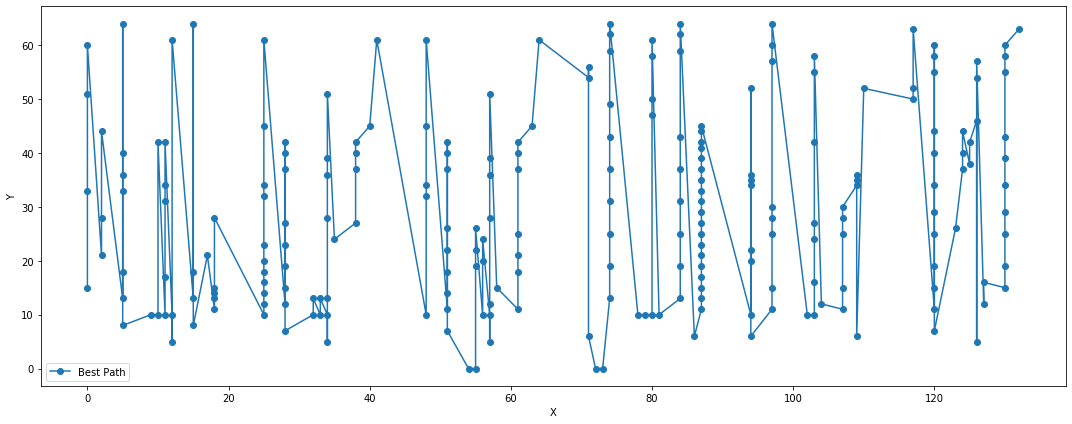

In [10]:
def plot_route(coordinates, order=None, is_route=True):
    x = list()
    y = list()
    if order is not None:
        for point in order:
            x.append(coordinates[point][0])
            y.append(coordinates[point][1])
    else:
        for c in coordinates:
            x.append(c[0])
            y.append(c[1])

    linestyle = '-' if is_route else ''
    plt.figure(figsize=(15,6))
    plt.plot(x, y, label='Best Path', linestyle=linestyle, marker='o')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.tight_layout()
    plt.show()
    
plot_route(coordinates,range(len(individual)))